<a href="https://colab.research.google.com/github/Agataplucienik/mold_detection/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: agataplu
Your Kaggle Key: ··········


100%|██████████| 1.98G/1.98G [00:20<00:00, 104MB/s]


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
!unzip fruit-and-vegetable-image-recognition.zip

In [5]:
train_dir = r"/content/fruit-and-vegetable-image-recognition/train"
valid_dir = r'/content/fruit-and-vegetable-image-recognition/validation'

In [6]:
train_dir


'/content/fruit-and-vegetable-image-recognition/train'

In [7]:
training_set= tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 3115 files belonging to 36 classes.


In [8]:
validation_set= tf.keras.utils.image_dataset_from_directory(
    valid_dir,
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 351 files belonging to 36 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

In [10]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                   

In [11]:
cnn.compile(loss='categorical_crossentropy' , optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001) , metrics='accuracy')

In [12]:
history = cnn.fit(training_set,
          validation_data = validation_set,
          epochs = 16)

Epoch 1/16
98/98 [==============================] - 978s 10s/step - loss: 15.2468 - accuracy: 0.0327 - val_loss: 3.5093 - val_accuracy: 0.1339
Epoch 2/16
98/98 [==============================] - 978s 10s/step - loss: 3.5179 - accuracy: 0.0616 - val_loss: 3.2748 - val_accuracy: 0.2365
Epoch 3/16
98/98 [==============================] - 989s 10s/step - loss: 3.2218 - accuracy: 0.1631 - val_loss: 2.8525 - val_accuracy: 0.3732
Epoch 4/16
98/98 [==============================] - 977s 10s/step - loss: 2.4722 - accuracy: 0.3766 - val_loss: 1.8646 - val_accuracy: 0.6040
Epoch 5/16
98/98 [==============================] - 986s 10s/step - loss: 1.8804 - accuracy: 0.5506 - val_loss: 1.6318 - val_accuracy: 0.6752
Epoch 6/16
98/98 [==============================] - 951s 10s/step - loss: 1.4385 - accuracy: 0.6722 - val_loss: 1.4791 - val_accuracy: 0.7236
Epoch 7/16
98/98 [==============================] - 938s 10s/step - loss: 1.1214 - accuracy: 0.7409 - val_loss: 1.1923 - val_accuracy: 0.7692
Epoch

In [13]:
cnn.save('GAY.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


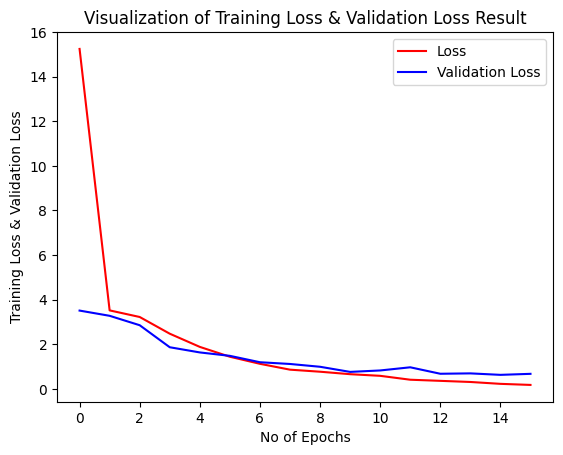

In [14]:
plt.plot(history.history['loss'],color='red',label='Loss')
plt.plot(history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

In [17]:
test_set= tf.keras.utils.image_dataset_from_directory(
    r'/content/fruit-and-vegetable-image-recognition/test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(224,224),
    shuffle= True,
    seed=None,
    validation_split=None,
    subset= None,
    interpolation = "bilinear",
    follow_links= False,
    crop_to_aspect_ratio = False

)

Found 359 files belonging to 36 classes.


In [18]:
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 37s 2s/step - loss: 0.6568 - accuracy: 0.9499


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# ... your previous code ...

# Load the saved model
loaded_model = tf.keras.models.load_model('GAY.h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []


1/1 [==============================] - 2s 2s/step
Classification Report:
                precision    recall  f1-score   support

        apple       0.78      0.70      0.74        10
       banana       1.00      0.78      0.88         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.82      1.00      0.90         9
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.80      0.89        10
       carrot       1.00      0.89      0.94         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.89      0.89      0.89         9
         corn       0.75      0.90      0.82        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       0.91      1.00      0.95        10
       ginger       1.00      1.00      1.00        10
       grapes       1.00      1.00      1.00         9
     jalepeno       1.00      1.00      1.00 

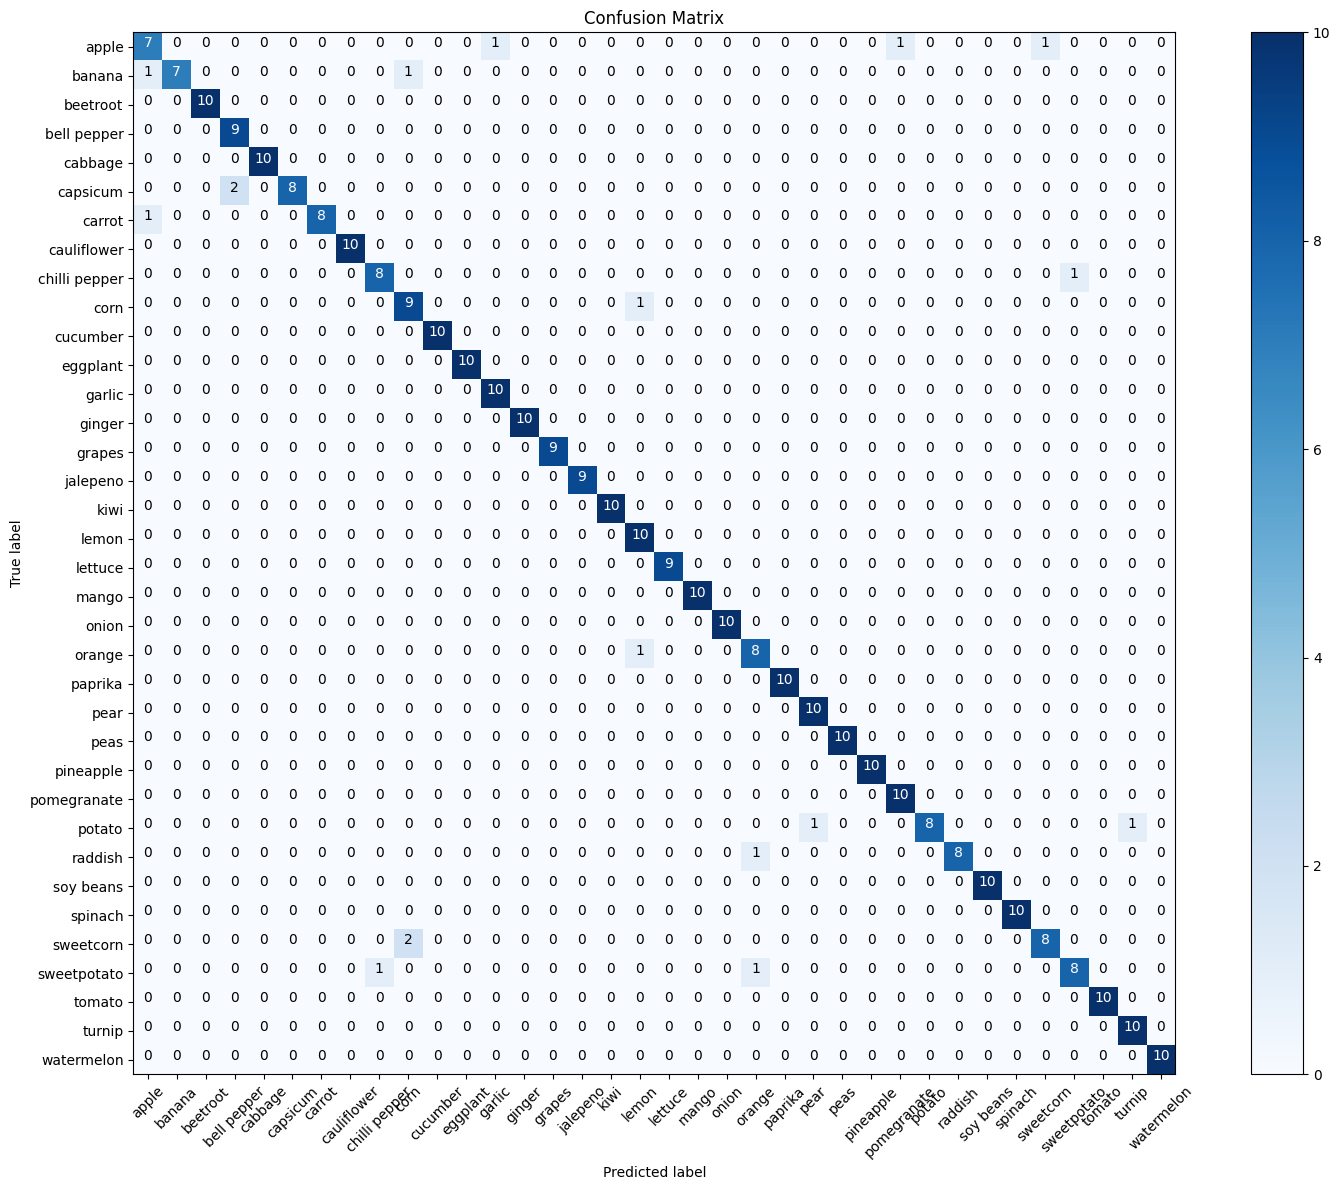

In [21]:
# Iterate through the validation set and make predictions
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = validation_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(16, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
plot_confusion_matrix(confusion, class_names)
plt.show()

In [22]:
predictions = loaded_model.predict(watermelon.png)

NameError: ignored

1/1 [==============================] - 2s 2s/step


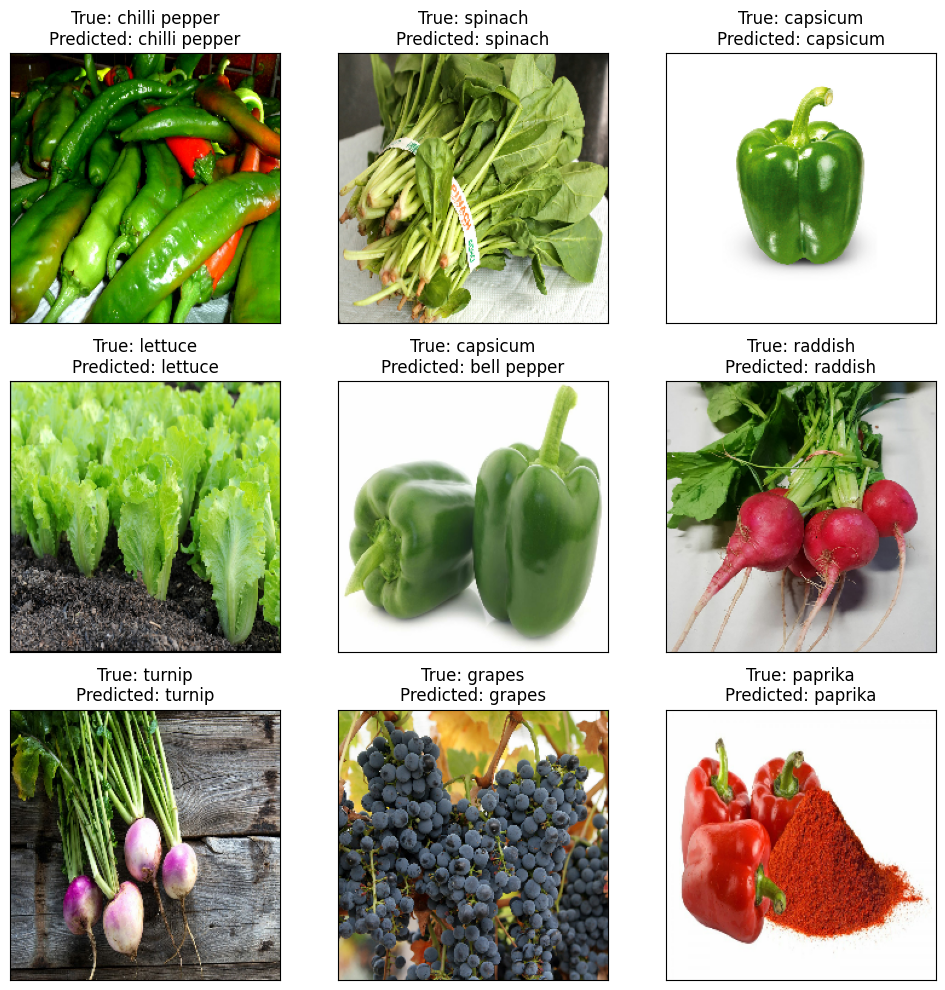

In [23]:
import matplotlib.pyplot as plt

# Assuming you have your CNN model (cnn) and test dataset (test_set)
# The 'pred' variable is already defined with the predicted labels

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()

In [33]:
img_path = 'watermelon.png'
img = image.load_img(img_path, target_size=(224, 224))  # Adjust target size based on your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values

# Make predictions
predictions = cnn.predict(img_array)

1/1 [==============================] - 0s 262ms/step


In [32]:
from keras.preprocessing import image

In [34]:
# Display the predicted class probabilities
print("Predicted probabilities:", predictions)

# Get the predicted class label
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class)


Predicted probabilities: [[0.02963264 0.03775703 0.01626884 0.02205469 0.0265912  0.02150532
  0.03042179 0.01991312 0.03034201 0.03116295 0.01912153 0.02093473
  0.03279972 0.01899568 0.03568455 0.02399396 0.03138058 0.03463111
  0.03967876 0.02332734 0.03252033 0.04675452 0.02927231 0.03139888
  0.03695479 0.02240774 0.01953477 0.03222743 0.0255941  0.03709253
  0.01900019 0.03877169 0.02621493 0.02122653 0.01790378 0.01692796]]
Predicted class: 21


In [37]:
predicted_label = class_names[np.argmax(predictions)]
predicted_label

'orange'